In [1]:
import pandas as pd

In [2]:
#학습 데이터
train = pd.read_csv(r"/content/labeledTrainData.tsv", header=0, delimiter='\t', quoting=3)
#테스트 데이터
test = pd.read_csv(r"/content/unlabeledTrainData.tsv", header=0, delimiter='\t', quoting=3)

In [3]:
# review의 첫 번째 데이터의 HTML 태그 제거
from bs4 import BeautifulSoup

example1 = BeautifulSoup(train['review'][0], "html.parser")
print(train['review'][0][:700])
example1.get_text()[:700]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik


'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [4]:
# 정규표현식을 사용해서 특수문자를 제거
import re
# 소문자와 대문자가 아닌 것은 공백으로 대체한다.
# ^ : not을 의미
letters_only = re.sub('[^a-zA-z]', ' ', example1.get_text())
letters_only[:700]

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [5]:
#토큰화
# 모두 소문자로 변환한다.
lower_case = letters_only.lower()
# 문자를 나눈다. => 토큰화
words = lower_case.split()
print(len(words))
words[:10]

437


['with',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with']

In [6]:
# stopwords 불러오기
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')[:10]

# stopwords 를 제거한 토큰들
words = [w for w in words if not w in stopwords.words('english')]
print(len(words))
words[:10]

219


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [7]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
words = [stemmer.stem(w) for w in words]

# 처리 후 단어
words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

In [8]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

print(wordnet_lemmatizer.lemmatize('fly'))
print(wordnet_lemmatizer.lemmatize('flies'))

words = [wordnet_lemmatizer.lemmatize(w) for w in words]

# 처리 후 단어
words[:10]

[nltk_data] Downloading package wordnet to /root/nltk_data...


fly
fly


['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

In [9]:
def review_to_words(raw_review):
    # 1. HTML 제거
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. 영문자가 아닌 문자는 공백으로 변환
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. 소문자 변환
    words = letters_only.lower().split()
    # 4. Stopwords를 세트로 변환
    stops = set(stopwords.words('english'))
    # 5. Stopwords 제거
    meaningful_words = [w for w in words if not w in stops]
    # 6. 어간추출
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. 공백으로 구분된 문자열로 결합하여 결과를 반환
    return(' '.join(stemming_words))

In [10]:
clean_review = review_to_words(train['review'][0])
clean_review

'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl stay

In [11]:
num_reviews = len(train['review'])

clean_train_reviews = []
for i in range(0, num_reviews):
    if (i + 1) % 5000 == 0:
        print('Review {} of {}'.format(i+1, num_reviews))
    clean_train_reviews.append(review_to_words(train['review'][i]))

%time train['review_clean'] = train['review'].apply(review_to_words)

<ipython-input-9-64f46e7a012f>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


Review 5000 of 25000
Review 10000 of 25000
Review 15000 of 25000
Review 20000 of 25000
Review 25000 of 25000
CPU times: user 59.5 s, sys: 878 ms, total: 1min
Wall time: 1min 1s


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

vectorizer = CountVectorizer(analyzer = 'word',
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             min_df = 2, # 토큰이 나타날 최소 문서 개수
                             ngram_range=(1, 3),
                             max_features = 5000)
vectorizer

CountVectorizer(max_features=5000, min_df=2, ngram_range=(1, 3))

In [13]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 분류기를 사용
forest = RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state=2018)

forest

RandomForestClassifier(n_jobs=-1, random_state=2018)

In [14]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 5000)
train_data_features = vectorizer.fit_transform(train['review'])
train_data_features = train_data_features.toarray()

forest = RandomForestClassifier(n_estimators = 100)
%time forest = forest.fit(train_data_features, train['sentiment'])

%time score = np.mean(cross_val_score(forest, train_data_features, train['sentiment'], cv=10, scoring='roc_auc'))
print(score)

CPU times: user 48.8 s, sys: 258 ms, total: 49 s
Wall time: 49.4 s
CPU times: user 7min 22s, sys: 3.63 s, total: 7min 26s
Wall time: 7min 29s
0.919788224


In [15]:
clean_test_reviews = []
for i in range(0, num_reviews):
     if (i + 1) % 5000 == 0 :
         print('Review {} of {}'.format(i+1, num_reviews))
     clean_test_reviews.append(review_to_words(test['review'][i]))

<ipython-input-9-64f46e7a012f>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


Review 5000 of 25000
Review 10000 of 25000
Review 15000 of 25000
Review 20000 of 25000
Review 25000 of 25000


In [18]:
selected_ids = test["id"].iloc[:len(result)]
selected_reviews = test["review"].iloc[:len(result)]

output = pd.DataFrame(data={"id": selected_ids, "sentiment": result, "review": selected_reviews})
output

,id,sentiment,review
0,"""9999_0""",0,"""Watching Time Chasers, it obvious that it was..."
1,"""45057_0""",1,"""I saw this film about 20 years ago and rememb..."
2,"""15561_0""",0,"""Minor Spoilers<br /><br />In New York, Joan B..."
3,"""7161_0""",0,"""I went to see this film with a great deal of ..."
4,"""43971_0""",1,"""Yes, I agree with everyone on this site this ..."
...,...,...,...
24995,"""46681_0""",0,"""This film is just silly and not worth your ti..."
24996,"""2355_0""",0,"""I loved \""Phantasm\"" of 1979, and i liked the..."
24997,"""7416_0""",0,"""This was one of my favorite movies as a child..."
24998,"""46746_0""",0,"""i am one of the most forgiving viewers when i..."


In [19]:
train_data_features = vectorizer.fit_transform(clean_train_reviews)
train_data_features.shape

(25000, 5000)

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(stopwords = STOPWORDS,
                          background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

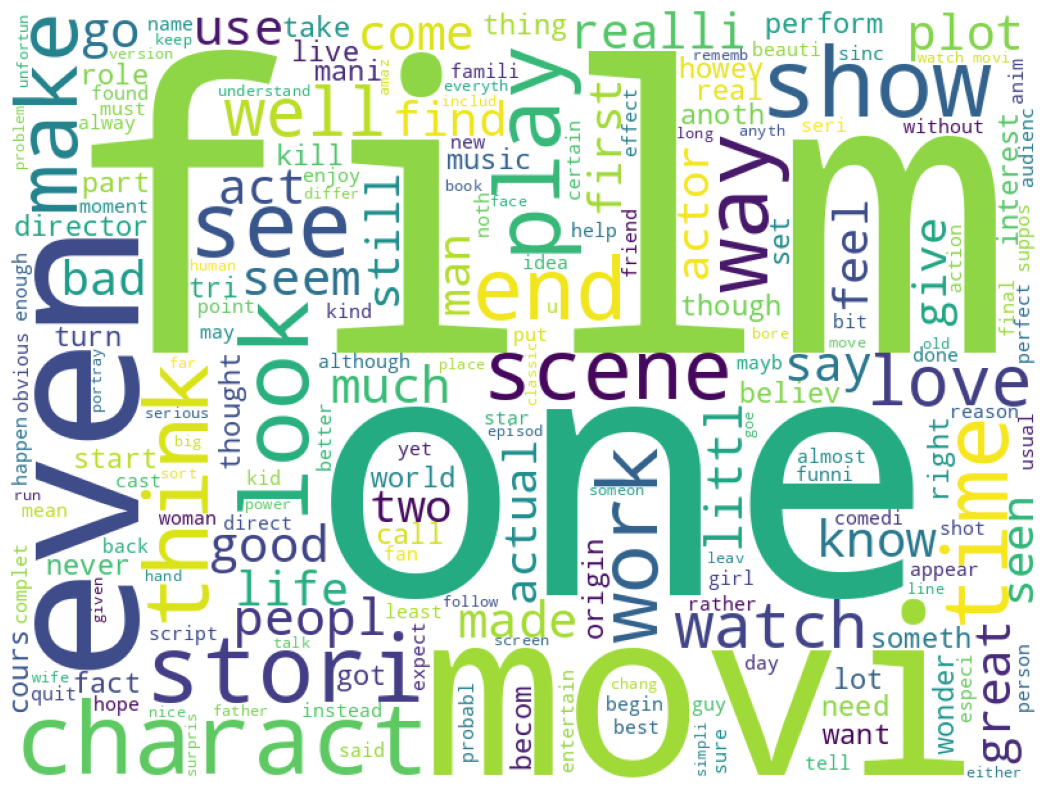

CPU times: user 23.4 s, sys: 2.38 s, total: 25.8 s
Wall time: 26 s


In [21]:
# train 데이터의 모든 단어에 대한 워드 클라우드를 그려본다.
%time displayWordCloud(' '.join(clean_train_reviews))